In [1]:
# pip install openpyxl

In [2]:
import pandas as pd
from pathlib import Path


In [3]:
file_path = 'etc/PoCData.xlsx'
last_data = pd.read_excel(file_path, sheet_name='LAST_DATA')
last_data_dict = pd.read_excel(file_path, sheet_name='LAST_DATA_DICT')

FileNotFoundError: [Errno 2] No such file or directory: 'Data/PoCData.xlsx'

In [19]:
last_data.columns = last_data.columns.str.strip()
last_data_dict.columns = last_data_dict.columns.str.strip()

In [20]:
last_data.head(1)

DocDate    DAYTIME          UWI   STRING_CODE STRING_NAME  ALT_NAME  \
0 2024-08-14 2024-05-21  MINA02112D1  MINA02112-01      3D-55N  M2112001   

  GRID_NAME DRILL_TYPE  PLUGBACK_DEPTH   PIS_DATE  ...  AVG_3WT_BF_BWPD  \
0    3D-55N       DIRC             NaN 2024-02-07  ...          3359.55   

   AVG_3WT_BF_BFPD AVG_5WT_BF_BOPD AVG_5WT_BF_BWPD AVG_5WT_BF_BFPD  \
0          3477.01          125.42         3276.34         3401.75   

  COMP_JOB_REMARK  ON_OFF_TIMER  ALLOC_GAS  AVG_ALLOC_GAS_3MO  AVG_WT_GAS_3MO  
0             DOW           NaN        NaN                NaN             NaN  

[1 rows x 225 columns]

In [21]:
last_data.isna()

DocDate  DAYTIME    UWI  STRING_CODE  STRING_NAME  ALT_NAME  GRID_NAME  \
0      False    False  False        False        False     False      False   
1      False    False  False        False        False     False      False   
2      False    False  False        False        False     False      False   
3      False    False  False        False        False     False      False   
4      False    False  False        False        False     False      False   
..       ...      ...    ...          ...          ...       ...        ...   
312    False    False  False        False        False     False      False   
313    False    False  False        False        False     False      False   
314    False    False  False        False        False     False      False   
315    False    False  False        False        False     False      False   
316    False    False  False        False        False     False      False   

     DRILL_TYPE  PLUGBACK_DEPTH  PIS_DATE  ...  AVG_3WT_BF_BWPD  \
0         False            True     False  ...            False   
1         False            True     False  ...            False   
2         False           False     False  ...            False   
3         False           False     False  ...            False   
4         False            True     False  ...            False   
..          ...             ...       ...  ...              ...   
312       False            True     False  ...            False   
313       False           False     False  ...            False   
314       False           False     False  ...            False   
315       False            True     False  ...            False   
316       False            True     False  ...            False   

     AVG_3WT_BF_BFPD  AVG_5WT_BF_BOPD  AVG_5WT_BF_BWPD  AVG_5WT_BF_BFPD  \
0              False            False            False            False   
1              False            False            False            False   
2              False            False            False            False   
3              False            False            False            False   
4              False            False            False            False   
..               ...              ...              ...              ...   
312            False            False            False            False   
313            False            False            False            False   
314            False            False            False            False   
315            False            False            False            False   
316            False            False            False            False   

     COMP_JOB_REMARK  ON_OFF_TIMER  ALLOC_GAS  AVG_ALLOC_GAS_3MO  \
0              False          True       True               True   
1              False          True       True               True   
2              False          True       True               True   
3              False          True       True               True   
4               True          True       True               True   
..               ...           ...        ...                ...   
312            False          True       True               True   
313            False          True       True               True   
314            False          True       True               True   
315             True          True       True               True   
316            False          True       True               True   

     AVG_WT_GAS_3MO  
0              True  
1              True  
2              True  
3              True  
4              True  
..              ...  
312            True  
313            True  
314            True  
315            True  
316            True  

[317 rows x 225 columns]

In [22]:
last_data_dict.head()

Value field_well_last_data              contextual  \
0    NaN              DAYTIME     LAST DATE REFRESHED   
1    NaN                  UWI  Unique Well Identifier   
2    NaN          STRING_CODE             kode string   
3    NaN          STRING_NAME             nama string   
4    NaN             ALT_NAME        alternative name   

                                      generated_text  
0  LAST DATE REFRESHED atau DAYTIME atau DAYTIME ...  
1   Unique Well Identifier atau UWI atau UWI adalah   
2  kode string atau STRING_CODE atau STRING CODE ...  
3  nama string atau STRING_NAME atau STRING NAME ...  
4  alternative name atau ALT_NAME atau ALT NAME a...

In [23]:
last_data_dict

Value field_well_last_data                       contextual  \
0      NaN              DAYTIME              LAST DATE REFRESHED   
1      NaN                  UWI           Unique Well Identifier   
2      NaN          STRING_CODE                      kode string   
3      NaN          STRING_NAME                      nama string   
4      NaN             ALT_NAME                 alternative name   
..     ...                  ...                              ...   
219    NaN      COMP_JOB_REMARK                              NaN   
220    NaN         ON_OFF_TIMER                              NaN   
221    NaN            ALLOC_GAS                              NaN   
222    NaN    AVG_ALLOC_GAS_3MO  average allocation gas 3 months   
223    NaN       AVG_WT_GAS_3MO   average well test gas 3 months   

                                        generated_text  
0    LAST DATE REFRESHED atau DAYTIME atau DAYTIME ...  
1     Unique Well Identifier atau UWI atau UWI adalah   
2    kode string atau STRING_CODE atau STRING CODE ...  
3    nama string atau STRING_NAME atau STRING NAME ...  
4    alternative name atau ALT_NAME atau ALT NAME a...  
..                                                 ...  
219       COMP_JOB_REMARK atau COMP JOB REMARK adalah   
220             ON_OFF_TIMER atau ON OFF TIMER adalah   
221                   ALLOC_GAS atau ALLOC GAS adalah   
222  average allocation gas 3 months atau AVG_ALLOC...  
223  average well test gas 3 months atau AVG_WT_GAS...  

[224 rows x 4 columns]

### Check Data Null

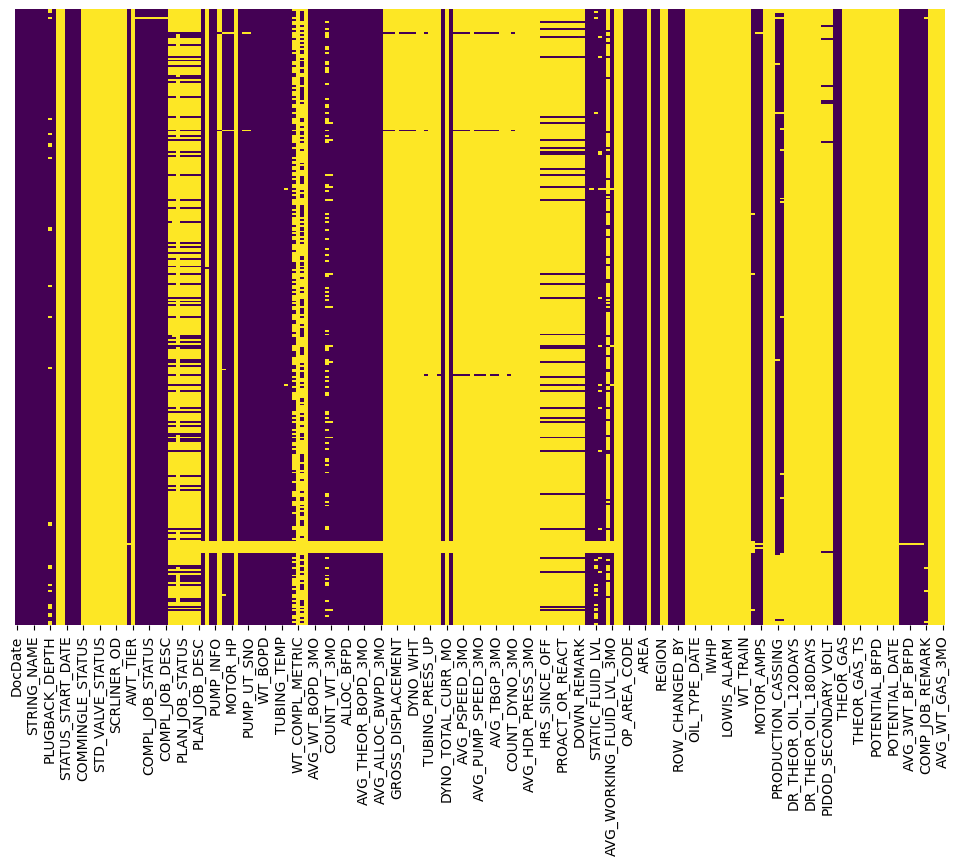

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the heatmap
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.heatmap(last_data.isna(), cmap='viridis', cbar=False, yticklabels=False)

# Show the plot
plt.show()

### Fill Na Data


In [25]:
pd.set_option('display.max_rows',20)

In [26]:
last_data = last_data.fillna("Data Not Found")

In [27]:
last_data.isnull().any()

DocDate              False
DAYTIME              False
UWI                  False
STRING_CODE          False
STRING_NAME          False
                     ...  
COMP_JOB_REMARK      False
ON_OFF_TIMER         False
ALLOC_GAS            False
AVG_ALLOC_GAS_3MO    False
AVG_WT_GAS_3MO       False
Length: 225, dtype: bool

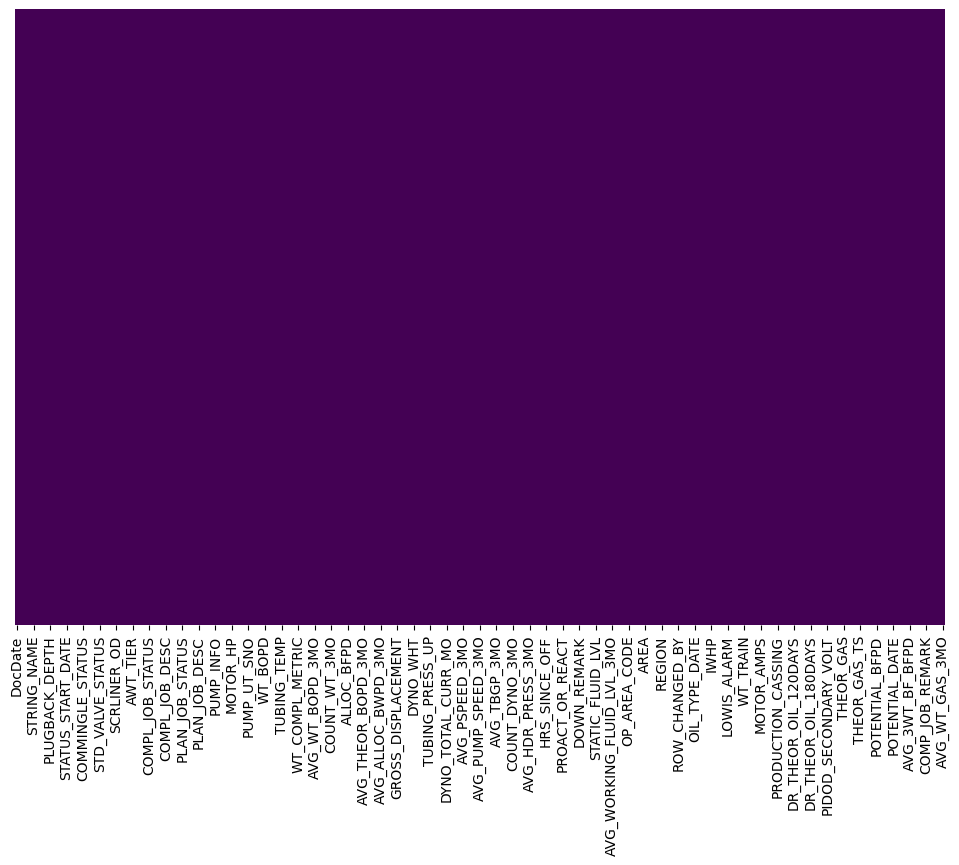

In [28]:

# Create the heatmap
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.heatmap(last_data.isna(), cmap='viridis', cbar=False, yticklabels=False)

# Show the plot
plt.show()

In [29]:
import pandas as pd
import os
from typing import Dict, Any

def get_description(field_name: str, last_data_dict: pd.DataFrame) -> str:
    """
    Get the description for a given field name from the last_data_dict DataFrame.
    
    Args:
    field_name (str): The name of the field to look up.
    last_data_dict (pd.DataFrame): DataFrame containing field descriptions.
    
    Returns:
    str: The description of the field, or an empty string if not found.
    """
    row = last_data_dict[last_data_dict['field_well_last_data'] == field_name]
    return row['generated_text'].values[0] if not row.empty else ""

def safe_filename(name: Any) -> str:
    """
    Generate a safe filename from the given name.
    
    Args:
    name (Any): The name to convert to a safe filename.
    
    Returns:
    str: A safe filename string.
    """
    if isinstance(name, float):
        return f"FLOAT_{name:.2f}".replace('.', '_')
    elif isinstance(name, str):
        return name.replace('/', '_')
    else:
        return str(name).replace('/', '_')

def process_well_data(last_data: pd.DataFrame, last_data_dict: pd.DataFrame, output_dir: str) -> None:
    """
    Process well data and create text files for each GRID_NAME.
    
    Args:
    last_data (pd.DataFrame): DataFrame containing well data.
    last_data_dict (pd.DataFrame): DataFrame containing field descriptions.
    output_dir (str): Directory to save output files.
    """
    os.makedirs(output_dir, exist_ok=True)
    grouped_data = last_data.groupby('GRID_NAME')

    for grid_name, group in grouped_data:
        output = [f"This is general information about well {grid_name} containing well information, well test date, etc.\n"]
        
        for _, row in group.iterrows():
            for column in row.index:
                description = get_description(column, last_data_dict)
                value = row[column]
                output.append(f"well {grid_name} {description} {value}" if description else f"{column} is {value}")
        
        full_text = ".\n".join(output)
        file_name = f"{safe_filename(grid_name)}.txt"
        file_path = os.path.join(output_dir, file_name)
        
        with open(file_path, 'w', encoding='utf-8') as f:
            f.write(full_text)


In [30]:
output_dir = 'output_files'
process_well_data(last_data, last_data_dict, output_dir)
print(f"Files have been created in the '{output_dir}' directory")

Files have been created in the 'output_files' directory
